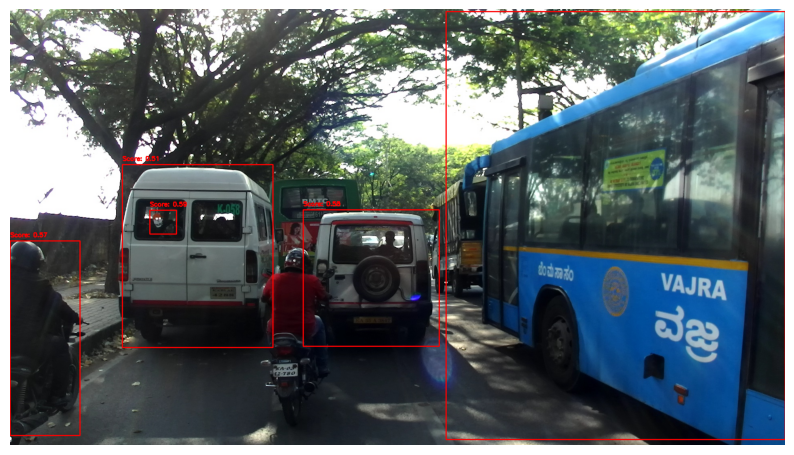

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

# Load the pre-trained SSD model from TensorFlow Hub
detector = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")

def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def detect_objects(image):
    img = tf.convert_to_tensor(image, dtype=tf.uint8)[tf.newaxis, ...]
    result = detector(img)
    return result

def draw_boxes(image, detections):
    img_with_boxes = image.copy()
    h, w, _ = image.shape
    
    for i in range(detections['detection_boxes'].shape[1]):
        ymin, xmin, ymax, xmax = detections['detection_boxes'][0][i].numpy()
        (left, right, top, bottom) = (xmin * w, xmax * w, ymin * h, ymax * h)
        
        if detections['detection_scores'][0][i].numpy() >= 0.5:
            cv2.rectangle(img_with_boxes, (int(left), int(top)), (int(right), int(bottom)), (255, 0, 0), 2)
            label = f"Score: {detections['detection_scores'][0][i].numpy():.2f}"
            cv2.putText(img_with_boxes, label, (int(left), int(top) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
    return img_with_boxes

# Path to  image
img_path = r'C:\Users\sai\Desktop\intel project eureka\vechile_cut-in_detection_system\car data set\images\0001308.jpeg'

# Load and preprocess the image
preprocessed_image = preprocess_image(img_path)

# Detect objects
detections = detect_objects(preprocessed_image)

# Draw bounding boxes on the image
image_with_boxes = draw_boxes(preprocessed_image, detections)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image_with_boxes)
plt.axis('off')
plt.show()


Estimated distance: 24.234430464541738
Estimated speed: 14.234430464541738
Estimated Time to Collision: 1.7025219607423148
Safe


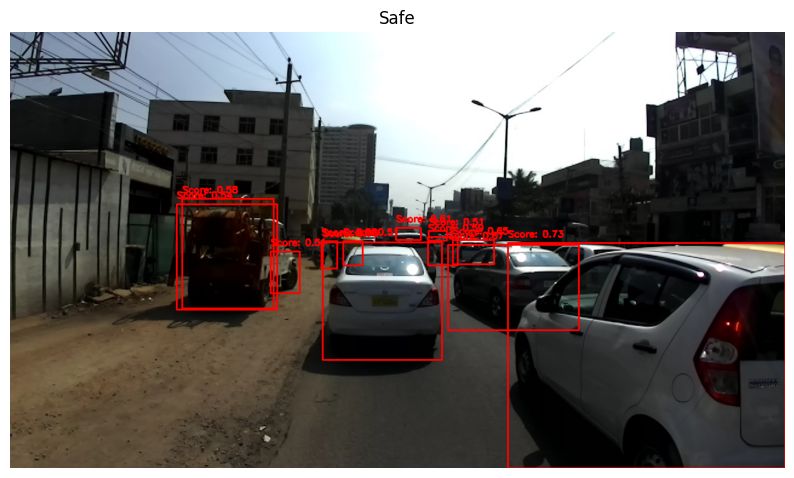

In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import time

# Load the pre-trained SSD model from TensorFlow Hub
detector = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")

def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def detect_objects(image):
    img = tf.convert_to_tensor(image, dtype=tf.uint8)[tf.newaxis, ...]
    result = detector(img)
    return result

def draw_boxes(image, detections):
    img_with_boxes = image.copy()
    h, w, _ = image.shape
    
    for i in range(detections['detection_boxes'].shape[1]):
        ymin, xmin, ymax, xmax = detections['detection_boxes'][0][i].numpy()
        (left, right, top, bottom) = (xmin * w, xmax * w, ymin * h, ymax * h)
        
        if detections['detection_scores'][0][i].numpy() >= 0.5:
            cv2.rectangle(img_with_boxes, (int(left), int(top)), (int(right), int(bottom)), (255, 0, 0), 2)
            label = f"Score: {detections['detection_scores'][0][i].numpy():.2f}"
            cv2.putText(img_with_boxes, label, (int(left), int(top) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
    return img_with_boxes

def calculate_distance(detection, image_shape):
    bbox = detection['detection_boxes'][0][0].numpy()  # Get the first detection
    ymin, xmin, ymax, xmax = bbox
    width = xmax - xmin
    height = ymax - ymin
    distance = 1 / (width * height)  # Simplified example
    return distance

def estimate_speed(previous_distance, current_distance, time_elapsed):
    speed = (current_distance - previous_distance) / time_elapsed
    return speed

def calculate_ttc(distance, speed):
    if speed <= 0:
        return float('inf')
    ttc = distance / speed
    return ttc

def issue_warning(ttc):
    if ttc < 0.7:
        return f"Warning: Collision imminent in {ttc:.2f} seconds!"
    else:
        return "Safe"

# Path to  image
img_path = r'C:\Users\sai\Desktop\intel project eureka\vechile_cut-in_detection_system\car data set\images\0013602.jpeg'

# Load and preprocess the image
preprocessed_image = preprocess_image(img_path)

# Detect objects
detections = detect_objects(preprocessed_image)

# Draw bounding boxes on the image
image_with_boxes = draw_boxes(preprocessed_image, detections)

# Calculate distance
distance = calculate_distance(detections, preprocessed_image.shape)
print(f"Estimated distance: {distance}")

# Simulate previous distance and time elapsed for speed estimation
previous_distance = 10  # Placeholder value
time_elapsed = 1        # Placeholder value

# Estimate speed
speed = estimate_speed(previous_distance, distance, time_elapsed)
print(f"Estimated speed: {speed}")

# Calculate Time to Collision (TTC)
ttc = calculate_ttc(distance, speed)
print(f"Estimated Time to Collision: {ttc}")

# Issue warning if necessary
warning_message = issue_warning(ttc)
print(warning_message)

# Display the image with bounding boxes and warning message
plt.figure(figsize=(10, 10))
plt.imshow(image_with_boxes)
plt.axis('off')
plt.title(warning_message)
plt.show()
